In [ ]:
!pip install simpletransformers

     |████████████████████████████████| 215kB 2.8MB/s 
     |████████████████████████████████| 3.0MB 8.6MB/s 
     |████████████████████████████████| 1.4MB 29.4MB/s 
     |████████████████████████████████| 7.2MB 38.1MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 317kB 40.1MB/s 
     |████████████████████████████████| 778kB 39.2MB/s 
     |████████████████████████████████| 163kB 42.3MB/s 
     |████████████████████████████████| 102kB 11.0MB/s 
     |████████████████████████████████| 102kB 11.0MB/s 
     |████████████████████████████████| 122kB 43.8MB/s 
     |████████████████████████████████| 4.4MB 36.6MB/s 
     |████████████████████████████████| 112kB 22.3MB/s 
     |████████████████████████████████| 1.1MB 35.8MB/s 
     |████████████████████████████████| 890kB 41.1MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 122kB 39.3MB/s 


In [ ]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import re

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train = pd.read_csv('train.csv', error_bad_lines=False)
test=pd.read_csv('test.csv')
train=train.drop('ID', axis=1)

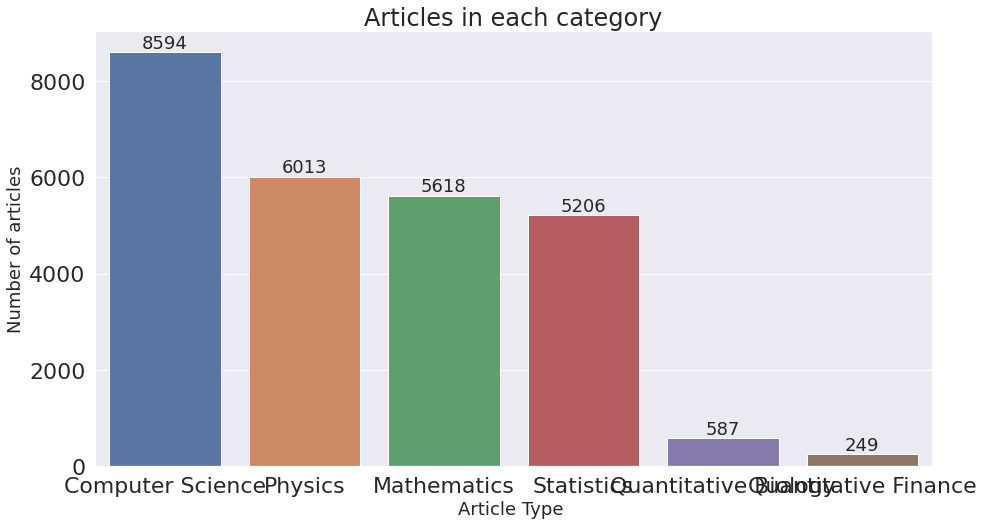

In [ ]:
categories = list(train.columns[2:].values)
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories, train.iloc[:,2:].sum().values)
plt.title("Articles in each category", fontsize=24)
plt.ylabel('Number of articles', fontsize=18)
plt.xlabel('Article Type ', fontsize=18)
#adding the text labels

rects = ax.patches
labels = train.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

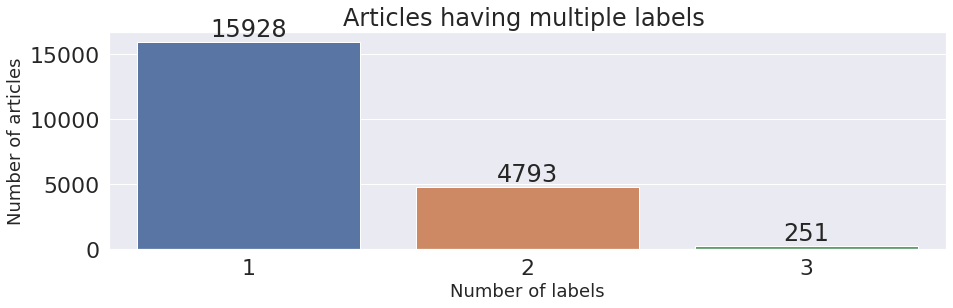

In [ ]:
rowSums = train.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
#multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,4))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Articles having multiple labels ")
plt.ylabel('Number of articles', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

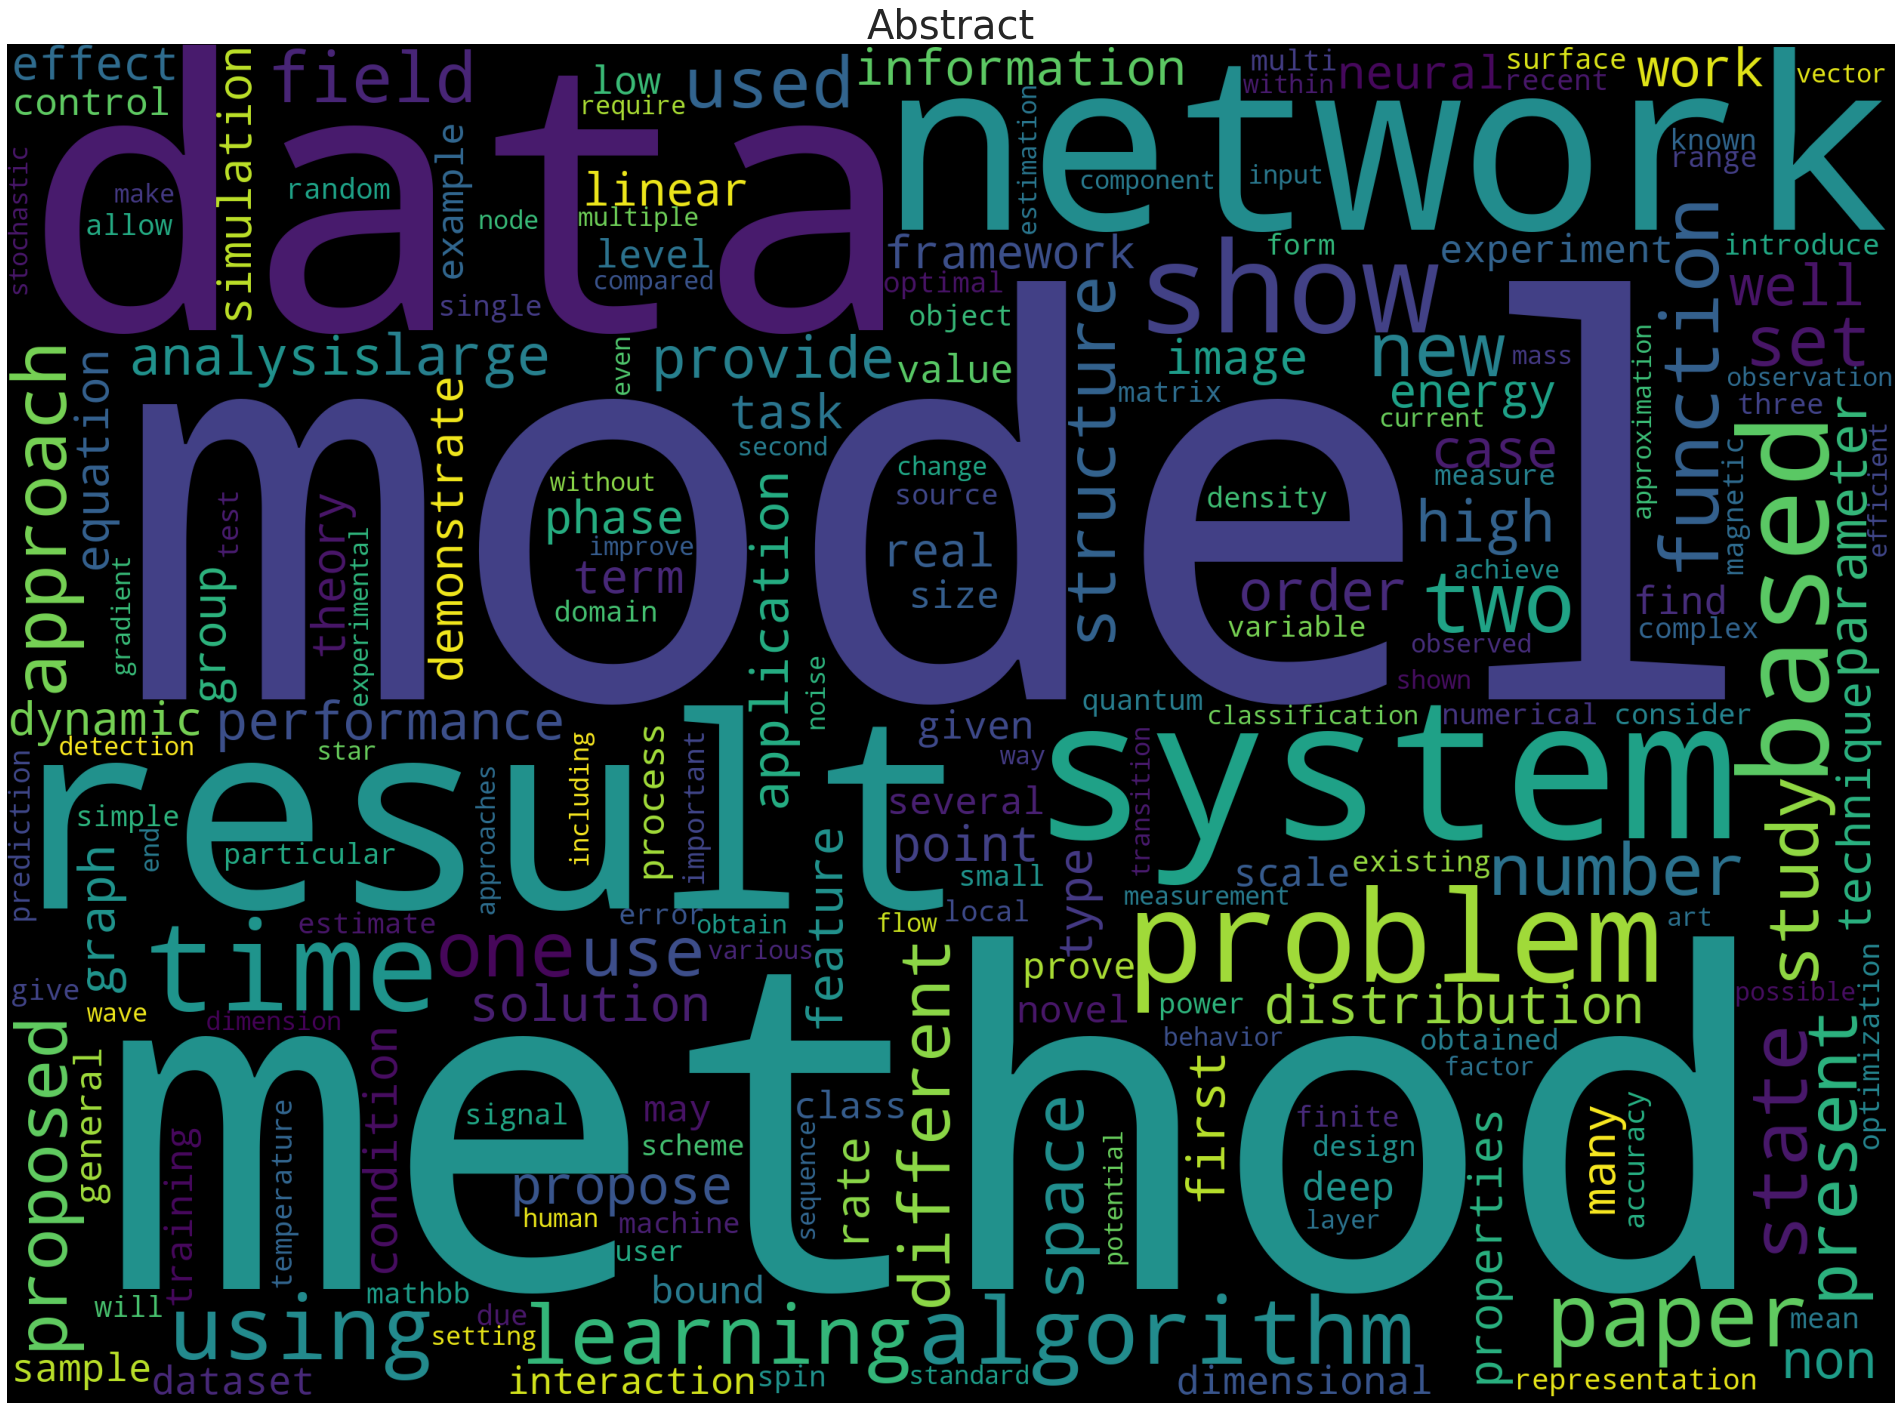

In [ ]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))
# clean
subset = train
text = subset.ABSTRACT.values
articles = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Abstract",fontsize=40)
plt.imshow(articles)

In [ ]:
data = train

def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
data['TITLE'] = data['TITLE'].str.lower()
data['TITLE'] = data['TITLE'].apply(cleanHtml)
data['TITLE'] = data['TITLE'].apply(cleanPunc)
data['TITLE'] = data['TITLE'].apply(keepAlpha)
data['ABSTRACT'] = data['ABSTRACT'].str.lower()
data['ABSTRACT'] = data['ABSTRACT'].apply(cleanHtml)
data['ABSTRACT'] = data['ABSTRACT'].apply(cleanPunc)
data['ABSTRACT'] = data['ABSTRACT'].apply(keepAlpha)

In [ ]:
data['title_abstract_combined']=data['TITLE']+" "+data['ABSTRACT']

In [ ]:
data.iloc[0]["title_abstract_combined"]

'reconstructing subject specific effect maps predictive models allow subject specific inference when analyzing disease related alterations in neuroimaging data given a subjects data inference can be made at two levels  global i e identifiying condition presence for the subject and local i e detecting condition effect on each individual measurement extracted from the subjects data while global inference is widely used local inference which can be used to form subject specific effect maps is rarely used because existing models often yield noisy detections composed of dispersed isolated islands in this article we propose a reconstruction method named rsm to improve subject specific detections of predictive modeling approaches and in particular binary classifiers rsm specifically aims to reduce noise due to sampling error associated with using a finite sample of examples to train classifiers the proposed method is a wrapper type algorithm that can be used with different binary classifiers 

In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','e','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub("", sentence)
data['title_abstract_combined'] = data['title_abstract_combined'].apply(removeStopWords)


In [ ]:
data.iloc[0]["title_abstract_combined"]

'reconstructing subject specific effect maps predictive models allow subject specific inference analyzing disease related alterations neuroimaging data given subjects data inference made levels global identifiying condition presence subject local detecting condition effect individual measurement extracted subjects data global inference widely used local inference used form subject specific effect maps rarely used existing models often yield noisy detections composed dispersed isolated islands article propose reconstruction method named rsm improve subject specific detections predictive modeling approaches particular binary classifiers rsm specifically aims reduce noise due sampling error associated using finite sample examples train classifiers proposed method wrapper type algorithm used different binary classifiers diagnostic manner without information condition presence reconstruction posed maximum posteriori problem prior model whose parameters estimated training data classifier spe

In [ ]:
def remove_extra_white_spaces(sentence):
  sentence=sentence.replace("  ", " ")
  sentence=sentence.replace("   ", " ")
  sentence=sentence.replace("    ", " ")
  sentence=sentence.replace("     ", " ")
  sentence=sentence.replace("   ", " ")
  return sentence

data['cleaned_text']=data['title_abstract_combined'].apply(remove_extra_white_spaces)

In [ ]:
data.head()

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,title_abstract_combined
0,reconstructing subject specific effect maps,predictive models allow subject specific infer...,1,0,0,0,0,0,reconstructing subject specific effect maps pr...
1,rotation invariance neural network,rotation invariance and translation invariance...,1,0,0,0,0,0,rotation invariance neural network rotation in...
2,spherical polyharmonics and poisson kernels fo...,we introduce and develop the notion of spheric...,0,0,1,0,0,0,spherical polyharmonics poisson kernels polyha...
3,a finite element approximation for the stochas...,the stochastic landau lifshitz gilbert llg equ...,0,0,1,0,0,0,finite element approximation stochastic maxwel...
4,comparative study of discrete wavelet transfor...,fourier transform infra red ftir spectra of sa...,1,0,0,1,0,0,comparative study discrete wavelet transforms ...


In [ ]:
data.iloc[0]["title_abstract_combined"]

'reconstructing subject specific effect maps predictive models allow subject specific inference  analyzing disease related alterations  neuroimaging data given  subjects data inference   made   levels  global   identifiying condition presence   subject  local   detecting condition effect   individual measurement extracted   subjects data  global inference  widely used local inference    used  form subject specific effect maps  rarely used  existing models often yield noisy detections composed  dispersed isolated islands   article  propose  reconstruction method named rsm  improve subject specific detections  predictive modeling approaches   particular binary classifiers rsm specifically aims  reduce noise due  sampling error associated  using  finite sample  examples  train classifiers  proposed method   wrapper type algorithm    used  different binary classifiers   diagnostic manner   without information  condition presence reconstruction  posed   maximum  posteriori problem   prior m

In [ ]:
!pip install simpletransformers

     |████████████████████████████████| 215kB 8.8MB/s 
     |████████████████████████████████| 7.2MB 27.7MB/s 
     |████████████████████████████████| 71kB 9.4MB/s 
     |████████████████████████████████| 317kB 58.2MB/s 
     |████████████████████████████████| 778kB 48.0MB/s 
     |████████████████████████████████| 1.4MB 56.5MB/s 
     |████████████████████████████████| 3.0MB 54.4MB/s 
     |████████████████████████████████| 102kB 13.3MB/s 
     |████████████████████████████████| 112kB 60.8MB/s 
     |████████████████████████████████| 4.4MB 48.4MB/s 
     |████████████████████████████████| 1.1MB 50.6MB/s 
     |████████████████████████████████| 890kB 53.4MB/s 
     |████████████████████████████████| 163kB 55.6MB/s 
     |████████████████████████████████| 122kB 57.8MB/s 
     |████████████████████████████████| 102kB 12.0MB/s 
     |████████████████████████████████| 122kB 59.4MB/s 
     |████████████████████████████████| 71kB 11.0MB/s 
     |████████████████████████████████| 71kB 9.0MB/s

In [ ]:
from simpletransformers.classification import MultiLabelClassificationModel

model = MultiLabelClassificationModel('roberta', 'roberta-base', num_labels=6, 
                                      args={'train_batch_size':2, 'gradient_accumulation_steps':16, 
                                            'learning_rate': 3e-5, 'num_train_epochs': 5, 'max_seq_length': 512})

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultiLabelSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultiLabelSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'clas

In [ ]:
from simpletransformers.classification import MultiLabelClassificationModel

model2 = MultiLabelClassificationModel('distilbert', 'distilbert-base-uncased', num_labels=6, 
                                      args={'train_batch_size':8, 'gradient_accumulation_steps':16, 
                                            'learning_rate': 3e-5, 'num_train_epochs': 3, 'max_seq_length': 512})

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForMultiLabelSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing DistilBertForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForMultiLabelSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier

In [ ]:
data.head()

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,title_abstract_combined,cleaned_text
0,reconstructing subject specific effect maps,predictive models allow subject specific infer...,1,0,0,0,0,0,reconstructing subject specific effect maps pr...,reconstructing subject specific effect maps pr...
1,rotation invariance neural network,rotation invariance and translation invariance...,1,0,0,0,0,0,rotation invariance neural network rotation in...,rotation invariance neural network rotation in...
2,spherical polyharmonics and poisson kernels fo...,we introduce and develop the notion of spheric...,0,0,1,0,0,0,spherical polyharmonics poisson kernels poly...,spherical polyharmonics poisson kernels polyha...
3,a finite element approximation for the stochas...,the stochastic landau lifshitz gilbert llg equ...,0,0,1,0,0,0,finite element approximation stochastic max...,finite element approximation stochastic maxw...
4,comparative study of discrete wavelet transfor...,fourier transform infra red ftir spectra of sa...,1,0,0,1,0,0,comparative study discrete wavelet transforms...,comparative study discrete wavelet transforms ...


In [ ]:
train_data=data

train_data["text"]=data["title_abstract_combined"]

train_data.head(1)

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,title_abstract_combined,text
0,reconstructing subject specific effect maps,predictive models allow subject specific infer...,1,0,0,0,0,0,reconstructing subject specific effect maps pr...,reconstructing subject specific effect maps pr...


In [ ]:
data.rename(columns = {'Computer Science':'CS', 'Quantitative Biology':'QB', 
                              'Quantitative Finance':'QF'}, inplace = True) 

In [ ]:
data.head()

,TITLE,ABSTRACT,CS,Physics,Mathematics,Statistics,QB,QF,title_abstract_combined,text
0,reconstructing subject specific effect maps,predictive models allow subject specific infer...,1,0,0,0,0,0,reconstructing subject specific effect maps pr...,reconstructing subject specific effect maps pr...
1,rotation invariance neural network,rotation invariance and translation invariance...,1,0,0,0,0,0,rotation invariance neural network rotation in...,rotation invariance neural network rotation in...
2,spherical polyharmonics and poisson kernels fo...,we introduce and develop the notion of spheric...,0,0,1,0,0,0,spherical polyharmonics poisson kernels polyha...,spherical polyharmonics poisson kernels polyha...
3,a finite element approximation for the stochas...,the stochastic landau lifshitz gilbert llg equ...,0,0,1,0,0,0,finite element approximation stochastic maxwel...,finite element approximation stochastic maxwel...
4,comparative study of discrete wavelet transfor...,fourier transform infra red ftir spectra of sa...,1,0,0,1,0,0,comparative study discrete wavelet transforms ...,comparative study discrete wavelet transforms ...


In [ ]:
train_data["labels"]=list(zip(data.CS.tolist(), data.Physics.tolist(), 
                                data.Mathematics.tolist(), data.Statistics.tolist(),  data.QB.tolist(), 
                                data.QF.tolist()))

In [ ]:
train_data.head(1)

,TITLE,ABSTRACT,CS,Physics,Mathematics,Statistics,QB,QF,title_abstract_combined,text,labels
0,reconstructing subject specific effect maps,predictive models allow subject specific infer...,1,0,0,0,0,0,reconstructing subject specific effect maps pr...,reconstructing subject specific effect maps pr...,"(1, 0, 0, 0, 0, 0)"


In [ ]:
final_df=train_data[["text","labels"]]

In [ ]:
train_data

,TITLE,ABSTRACT,CS,Physics,Mathematics,Statistics,QB,QF,title_abstract_combined,text,labels
0,reconstructing subject specific effect maps,predictive models allow subject specific infer...,1,0,0,0,0,0,reconstructing subject specific effect maps pr...,reconstructing subject specific effect maps pr...,"(1, 0, 0, 0, 0, 0)"
1,rotation invariance neural network,rotation invariance and translation invariance...,1,0,0,0,0,0,rotation invariance neural network rotation in...,rotation invariance neural network rotation in...,"(1, 0, 0, 0, 0, 0)"
2,spherical polyharmonics and poisson kernels fo...,we introduce and develop the notion of spheric...,0,0,1,0,0,0,spherical polyharmonics poisson kernels polyha...,spherical polyharmonics poisson kernels polyha...,"(0, 0, 1, 0, 0, 0)"
3,a finite element approximation for the stochas...,the stochastic landau lifshitz gilbert llg equ...,0,0,1,0,0,0,finite element approximation stochastic maxwel...,finite element approximation stochastic maxwel...,"(0, 0, 1, 0, 0, 0)"
4,comparative study of discrete wavelet transfor...,fourier transform infra red ftir spectra of sa...,1,0,0,1,0,0,comparative study discrete wavelet transforms ...,comparative study discrete wavelet transforms ...,"(1, 0, 0, 1, 0, 0)"
...,...,...,...,...,...,...,...,...,...,...,...
20967,contemporary machine learning a guide for pra...,machine learning is finding increasingly broad...,1,1,0,0,0,0,contemporary machine learning guide practitio...,contemporary machine learning guide practitio...,"(1, 1, 0, 0, 0, 0)"
20968,uniform diamond coatings on wc co hard alloy c...,polycrystalline diamond coatings have been gro...,0,1,0,0,0,0,uniform diamond coatings wc co hard alloy cutt...,uniform diamond coatings wc co hard alloy cutt...,"(0, 1, 0, 0, 0, 0)"
20969,analysing soccer games with clustering and con...,we present a new approach for identifying situ...,1,0,0,0,0,0,analysing soccer games clustering conceptors p...,analysing soccer games clustering conceptors p...,"(1, 0, 0, 0, 0, 0)"
20970,on the efficient simulation of the left tail o...,the sum of log normal variates is encountered ...,0,0,1,1,0,0,efficient simulation left tail sum correlated ...,efficient simulation left tail sum correlated ...,"(0, 0, 1, 1, 0, 0)"


In [ ]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence
  
train_data["text"]=train_data["text"].apply(stemming)
train_data.head()

,TITLE,ABSTRACT,CS,Physics,Mathematics,Statistics,QB,QF,title_abstract_combined,cleaned_text,text,labels
0,reconstructing subject specific effect maps,predictive models allow subject specific infer...,1,0,0,0,0,0,reconstructing subject specific effect maps pr...,reconstructing subject specific effect maps pr...,reconstruct subject specif effect map predict ...,"(1, 0, 0, 0, 0, 0)"
1,rotation invariance neural network,rotation invariance and translation invariance...,1,0,0,0,0,0,rotation invariance neural network rotation in...,rotation invariance neural network rotation in...,rotat invari neural network rotat invari trans...,"(1, 0, 0, 0, 0, 0)"
2,spherical polyharmonics and poisson kernels fo...,we introduce and develop the notion of spheric...,0,0,1,0,0,0,spherical polyharmonics poisson kernels poly...,spherical polyharmonics poisson kernels polyha...,spheric polyharmon poisson kernel polyharmon f...,"(0, 0, 1, 0, 0, 0)"
3,a finite element approximation for the stochas...,the stochastic landau lifshitz gilbert llg equ...,0,0,1,0,0,0,finite element approximation stochastic max...,finite element approximation stochastic maxw...,finit element approxim stochast maxwel landau ...,"(0, 0, 1, 0, 0, 0)"
4,comparative study of discrete wavelet transfor...,fourier transform infra red ftir spectra of sa...,1,0,0,1,0,0,comparative study discrete wavelet transforms...,comparative study discrete wavelet transforms ...,compar studi discret wavelet transform wavelet...,"(1, 0, 0, 1, 0, 0)"


In [ ]:
model.train_model(train_data)

KeyboardInterrupt: ignored

In [ ]:
test=pd.read_csv("test.csv")
print("Read the Test Data")
test.head()

Read the Test Data


,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...


In [ ]:
test.head()

,TITLE,ABSTRACT
0,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...


In [ ]:
test=test.drop('ID', axis=1)

In [ ]:
test['TITLE'] = test['TITLE'].str.lower()
test['TITLE'] = test['TITLE'].apply(cleanHtml)
test['TITLE'] = test['TITLE'].apply(cleanPunc)
test['TITLE'] = test['TITLE'].apply(keepAlpha)
test['ABSTRACT'] = test['ABSTRACT'].str.lower()
test['ABSTRACT'] = test['ABSTRACT'].apply(cleanHtml)
test['ABSTRACT'] = test['ABSTRACT'].apply(cleanPunc)
test['ABSTRACT'] = test['ABSTRACT'].apply(keepAlpha)

In [ ]:
test["text"]=test["TITLE"]+" "+test["ABSTRACT"]

In [ ]:
test.head()

,TITLE,ABSTRACT,text
0,closed form marginal likelihood in gamma poiss...,we present novel understandings of the gamma p...,closed form marginal likelihood in gamma poiss...
1,laboratory mid ir spectra of equilibrated and ...,meteorites contain minerals from solar system ...,laboratory mid ir spectra of equilibrated and ...
2,case for static amsdu aggregation in wlans,frame aggregation is a mechanism by which mult...,case for static amsdu aggregation in wlans fra...
3,the gaia eso survey the inner disk intermedi...,milky way open clusters are very diverse in te...,the gaia eso survey the inner disk intermedi...
4,witness functions versus interpretation functi...,proving that a cryptographic protocol is corre...,witness functions versus interpretation functi...


In [ ]:
test.iloc[0]["text"]

'closed form marginal likelihood in gamma poisson matrix factorization we present novel understandings of the gamma poisson gap model a probabilistic matrix factorization model for count data we show that gap can be rewritten free of the score activation matrix this gives us new insights about the estimation of the topic dictionary matrix by maximum marginal likelihood estimation in particular this explains the robustness of this estimator to over specified values of the factorization rank especially its ability to automatically prune irrelevant dictionary columns as empirically observed in previous work the marginalization of the activation matrix leads in turn to a new monte carlo expectation maximization algorithm with favorable properties'

In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','e','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
test['cleaned_text'] = test['text'].apply(removeStopWords)


In [ ]:
test['text']=test['cleaned_text'].apply(remove_extra_white_spaces)

In [ ]:
test["text"]=test["text"].apply(stemming)

In [ ]:
preds, outputs = model.predict(test["text"])

In [ ]:
preds

[[0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0],
 [1, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [1, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 0],
 [1, 0, 0, 0,

In [ ]:
submission=pd.read_csv("sample_submission.csv")
submission.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,0,0,0
1,20974,0,0,0,0,0,0
2,20975,0,0,0,0,0,0
3,20976,0,0,0,0,0,0
4,20977,0,0,0,0,0,0


In [ ]:
test_df=pd.read_csv("test.csv")

In [ ]:
sub_df = pd.DataFrame(preds, columns=['Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance'])
sub_df.head()

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [ ]:
sub_df["ID"]=test_df["ID"]
sub_df = sub_df[['ID', 'Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance']]

In [ ]:
sub_df.tail()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
8984,29957,1,0,0,0,0,0
8985,29958,0,0,1,0,0,0
8986,29959,0,0,0,0,1,0
8987,29960,0,0,0,1,0,0
8988,29961,0,0,1,0,0,0


In [ ]:
sub_df.to_csv("Roberta-Stemming.csv", index=None)

In [ ]:
cleaned_train_data=train_data[["text", "labels"]]
cleaned_train_data.head()

,text,labels
0,reconstructing subject specific effect maps pr...,"(1, 0, 0, 0, 0, 0)"
1,rotation invariance neural network rotation in...,"(1, 0, 0, 0, 0, 0)"
2,spherical polyharmonics poisson kernels polyha...,"(0, 0, 1, 0, 0, 0)"
3,finite element approximation stochastic maxw...,"(0, 0, 1, 0, 0, 0)"
4,comparative study discrete wavelet transforms ...,"(1, 0, 0, 1, 0, 0)"


In [ ]:
cleaned_train_data.to_csv("cleaned_train_data.csv", index=None)

In [ ]:
stemmed_data=cleaned_train_data

In [ ]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence
stemmed_data['text'] = stemmed_data['text'].apply(stemming)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
stemmed_data.to_csv("stemmed_data.csv", index=None)

In [ ]:
stemmed_data.head()

,text,labels,test
0,reconstruct subject specif effect map predict ...,"(1, 0, 0, 0, 0, 0)",reconstruct subject specif effect map predict ...
1,rotat invari neural network rotat invari trans...,"(1, 0, 0, 0, 0, 0)",rotat invari neural network rotat invari trans...
2,spheric polyharmon poisson kernel polyharmon f...,"(0, 0, 1, 0, 0, 0)",spheric polyharmon poisson kernel polyharmon f...
3,finit element approxim stochast maxwel landau ...,"(0, 0, 1, 0, 0, 0)",finit element approxim stochast maxwel landau ...
4,compar studi discret wavelet transform wavelet...,"(1, 0, 0, 1, 0, 0)",compar studi discret wavelet transform wavelet...


In [ ]:
categories = list(train.columns[2:].values)
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories, train.iloc[:,2:].sum().values)
plt.title("Articles in each category", fontsize=24)
plt.ylabel('Number of articles', fontsize=18)
plt.xlabel('Article Type ', fontsize=18)
#adding the text labels

rects = ax.patches
labels = train.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()